In [1]:
import sys
sys.path.append("./../")
import matplotlib.pyplot as plt
from sklearn.datasets import make_spd_matrix
import numpy as np
import zeus
print('zeus version:', zeus.__version__)

zeus version: 0.9


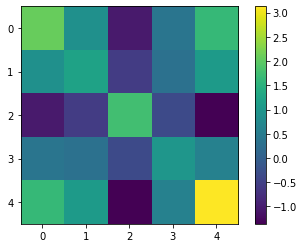

In [3]:
ndim = 5
nwalkers = 2*ndim
nsteps= 1000

C = make_spd_matrix(ndim)
plt.imshow(C)
plt.colorbar()

icov = np.linalg.inv(C)

mu = np.random.rand(ndim) * 100.0

def logp(x, mu, icov):
    return -0.5 * np.dot(np.dot((x-mu).T,icov),(x-mu))

start = np.random.rand(ndim)

In [6]:
sampler = zeus.sampler(logp, nwalkers, ndim, args=[mu, icov],parallel=True,mpi=True)
sampler.run(start, nsteps)


  0%|          | 2/1000 [00:11<1:38:33,  5.93s/it]Exception in callback BaseAsyncIOLoop._handle_events(120, 1)
handle: <Handle BaseAsyncIOLoop._handle_events(120, 1)>
Traceback (most recent call last):
  File "/Users/minas/anaconda3/lib/python3.7/asyncio/events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "/Users/minas/anaconda3/lib/python3.7/site-packages/tornado/platform/asyncio.py", line 138, in _handle_events
    handler_func(fileobj, events)
  File "/Users/minas/anaconda3/lib/python3.7/site-packages/tornado/netutil.py", line 260, in accept_handler
    connection, address = sock.accept()
  File "/Users/minas/anaconda3/lib/python3.7/socket.py", line 212, in accept
    fd, addr = self._accept()
OSError: [Errno 24] Too many open files
--- Logging error ---
Exception in default exception handler
Traceback (most recent call last):
  File "/Users/minas/anaconda3/lib/python3.7/asyncio/events.py", line 88, in _run
    self._context.run(self._callback, *s

Traceback (most recent call last):
  File "/Users/minas/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3325, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-6-54586745b225>", line 2, in <module>
    sampler.run(start, nsteps)
  File "./../zeus/zeus.py", line 118, in run
    results = list(client.gather(futures))
  File "/Users/minas/anaconda3/lib/python3.7/site-packages/distributed/client.py", line 1097, in __exit__
    self.close()
  File "/Users/minas/anaconda3/lib/python3.7/site-packages/distributed/client.py", line 1323, in close
    self.sync(_)
  File "/Users/minas/anaconda3/lib/python3.7/site-packages/distributed/client.py", line 763, in sync
    self.loop, func, *args, callback_timeout=callback_timeout, **kwargs
  File "/Users/minas/anaconda3/lib/python3.7/site-packages/distributed/utils.py", line 330, in sync
    e.wait(10)
  File "/Users/minas/anaconda3/lib/python3.7/threading.py", line 552, in wait
    s

KeyboardInterrupt: 

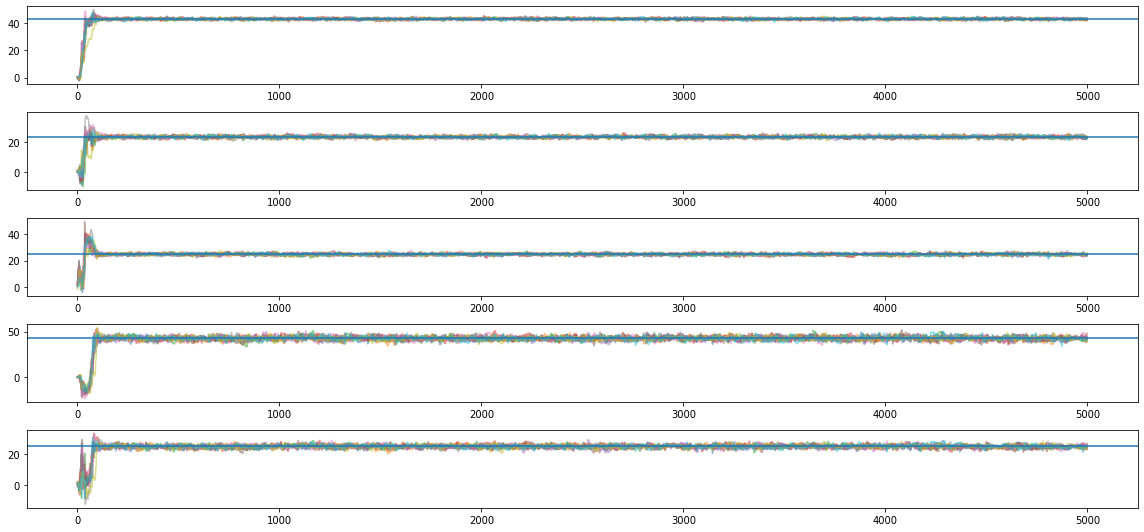

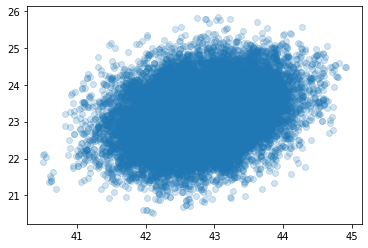

MCMC mean: [42.78149573 23.14656374 24.62735123 42.64836556 24.75644696]
TRUE mean: [42.78299766 23.1334591  24.63407634 42.64135356 24.76772364]
MCMC std: [0.59392608 0.72216387 0.73799905 2.14964034 1.08297154]
TRUE std: [0.59120251 0.71808008 0.74573163 2.15509307 1.07619879]
act: 10.931355039688105
ESS: 4573.998357794315
ESS/LE: 0.027674574703192893


In [4]:
plt.figure(figsize=(16,1.5*ndim))
for n in range(ndim):
    plt.subplot2grid((ndim, 1), (n, 0))
    plt.plot(np.arange(nsteps),sampler.chain[:,:,n].T,alpha=0.5)
    plt.axhline(y=mu[n])
plt.tight_layout()
plt.show()

trace = sampler.flatten()
plt.scatter(trace[:,0],trace[:,1], alpha=0.2)
plt.show()
print('MCMC mean:', np.mean(trace, axis=0))
print('TRUE mean:', mu)
print('MCMC std:', np.std(trace, axis=0))
print('TRUE std:', np.sqrt(np.diag(C)))


act_mean_minas = 0.0
for i in range(ndim):
    act_mean_minas += zeus.autocorrtime(trace[:,i]) 
act_mean_minas /= ndim
print('act:', act_mean_minas)
print('ESS:', nwalkers * nsteps / act_mean_minas)
print('ESS/LE:', (nwalkers * nsteps / act_mean_minas)/sampler.nlogp)